In [ ]:
import numpy as np
import random as rd

In [ ]:
betal = np.concatenate((
    np.linspace(0.1, 0.4, 4),
    np.arange(0.42, 0.59, 0.02),
    np.linspace(0.6, 1.0, 5)
))

betal

array([0.1 , 0.2 , 0.3 , 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54,
       0.56, 0.58, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

[0.1  0.2  0.3  0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6
 0.7  0.8  0.9  1.  ]
[0.152, 0.23199999999999998, 0.46399999999999997, 0.736, 0.76, 0.8160000000000001, 0.9279999999999999, 0.8559999999999999, 0.968, 0.9279999999999999, 0.968, 0.976, 0.976, 1.0, 0.984, 1.0, 0.992, 0.992]


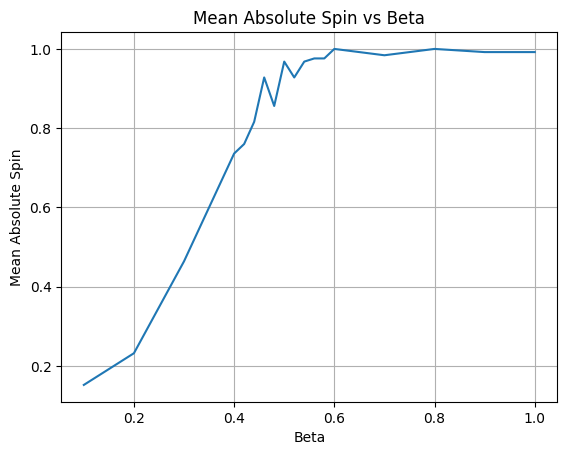

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 5  # 격자 크기
steps = 10000  # 시뮬레이션 스텝 수

def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))  # 랜덤 이진 스핀 격자 초기화 함수

def wolff_step(lattice, beta):
    L = lattice.shape[0]  # 격자 크기
    stack = []  # 클러스터 형성을 위한 스택
    cluster = set()  # 클러스터를 저장할 집합

    x, y = np.random.randint(L), np.random.randint(L)  # 랜덤한 격자 위치 선택
    seed_spin = lattice[x, y]  # 시드 스핀 값 저장
    stack.append((x, y))  # 스택에 추가
    cluster.add((x, y))  # 클러스터에 추가

    p_add = 1 - np.exp(-2 * beta)  # 클러스터에 스핀을 추가할 확률

    while stack:
        cx, cy = stack.pop()  # 스택에서 하나의 격자 위치 가져오기
        neighbors = [(cx, (cy + 1) % L), (cx, (cy - 1) % L),
                     ((cx + 1) % L, cy), ((cx - 1) % L, cy)]  # 이웃 격자 위치 리스트
        for nx, ny in neighbors:
            if lattice[nx, ny] == seed_spin and (nx, ny) not in cluster:
                if np.random.rand() < p_add:
                    stack.append((nx, ny))  # 스택에 추가하여 클러스터 확장
                    cluster.add((nx, ny))  # 클러스터에 추가

    for (x, y) in cluster:
        lattice[x, y] *= -1  # 클러스터에 속한 스핀 값 전부 반전

    return lattice

def mean_absolute_spin(lattice):
    return np.abs(np.mean(lattice))  # 격자 전체의 평균 절대 스핀 값 반환

# 주요 시뮬레이션 부분
betas = np.concatenate((
    np.linspace(0.1, 0.4, 4),
    np.arange(0.42, 0.59, 0.02),
    np.linspace(0.6, 1.0, 5)
))  # 시뮬레이션할 베타 값들

mean_abs_spins = []  # 각 베타 값에서의 평균 절대 스핀 값을 저장할 리스트

for beta in betas:
    mean_abs_spins_beta = []
    for _ in range(10):  # 각 베타 값에 대해 10번 반복하여 시뮬레이션 수행
        lattice = initialize_lattice(L)  # 초기 격자 생성
        for step in range(steps):
            lattice = wolff_step(lattice, beta)  # Wolff 알고리즘을 사용하여 시뮬레이션 진행
        mean_abs_spins_beta.append(mean_absolute_spin(lattice))  # 해당 시뮬레이션 결과의 평균 절대 스핀 값 저장
    mean_abs_spins.append(np.mean(mean_abs_spins_beta))  # 각 베타 값에서의 평균 절대 스핀 값의 평균 계산하여 리스트에 추가

print(mean_abs_spins)  # 각 베타 값에서의 평균 절대 스핀 값 출력

# 결과 그래프 그리기
plt.plot(betas, mean_abs_spins)
plt.xlabel('Beta')  # x축 레이블 설정
plt.ylabel('Mean Absolute Spin')  # y축 레이블 설정
plt.title('Mean Absolute Spin vs Beta')  # 그래프 제목 설정
plt.grid(True)  # 그리드 표시
plt.show()  # 그래프 출력


In [ ]:
print(mean_abs_spins)

[0.04, 0.2, 0.36, 0.76, 0.76, 0.76, 0.68, 0.6, 0.6, 0.28, 0.84, 1.0, 0.84, 0.92, 1.0, 0.68, 0.84, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


L = 5 ,10, 20일때

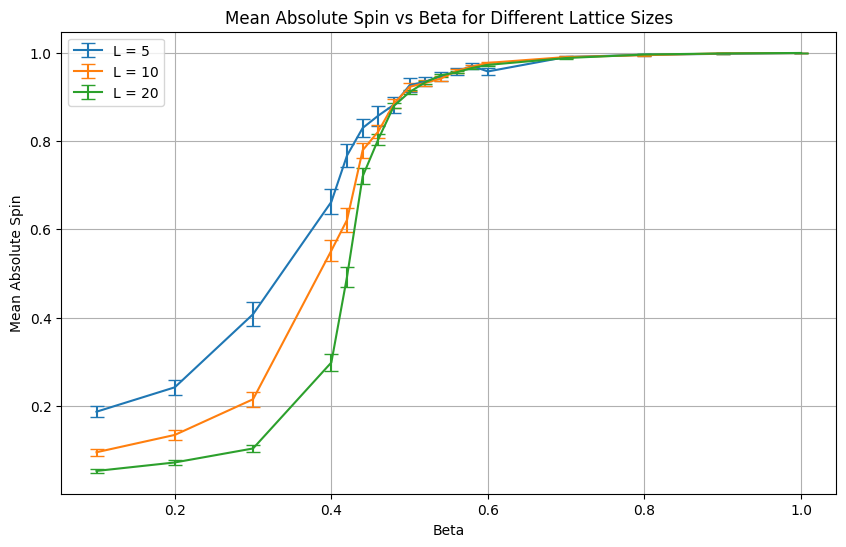

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

steps = 1000  # 시뮬레이션 스텝 수

def initialize_lattice(L):
    """
    L x L 크기의 랜덤 이진 스핀 격자를 초기화하는 함수
    """
    return np.random.choice([-1, 1], size=(L, L))

def wolff_step(lattice, beta):
    """
    Wolff 알고리즘을 사용하여 주어진 격자에 대해 한 번의 Monte Carlo 스텝을 수행하는 함수
    """
    L = lattice.shape[0]  # 격자의 크기
    stack = []  # 클러스터 형성을 위한 스택
    cluster = set()  # 클러스터를 저장할 집합

    x, y = np.random.randint(L), np.random.randint(L)  # 랜덤한 격자 위치 선택
    seed_spin = lattice[x, y]  # 시드 스핀 값 저장
    stack.append((x, y))  # 스택에 추가
    cluster.add((x, y))  # 클러스터에 추가

    p_add = 1 - np.exp(-2 * beta)  # 클러스터에 스핀을 추가할 확률

    while stack:
        cx, cy = stack.pop()  # 스택에서 하나의 격자 위치 가져오기
        neighbors = [(cx, (cy + 1) % L), (cx, (cy - 1) % L),
                     ((cx + 1) % L, cy), ((cx - 1) % L, cy)]  # 이웃 격자 위치 리스트
        for nx, ny in neighbors:
            if lattice[nx, ny] == seed_spin and (nx, ny) not in cluster:
                if np.random.rand() < p_add:
                    stack.append((nx, ny))  # 스택에 추가하여 클러스터 확장
                    cluster.add((nx, ny))  # 클러스터에 추가

    for (x, y) in cluster:
        lattice[x, y] *= -1  # 클러스터에 속한 스핀 값 전부 반전

    return lattice

def mean_absolute_spin(lattice):
    """
    주어진 격자의 평균 절대 스핀 값을 계산하는 함수
    """
    return np.abs(np.mean(lattice))

# Main Simulation
betas = np.concatenate((
    np.linspace(0.1, 0.4, 4),
    np.arange(0.42, 0.59, 0.02),
    np.linspace(0.6, 1.0, 5)
))  # 시뮬레이션할 베타 값들
Ls = [5, 10, 20]  # 시뮬레이션할 격자 크기들
mean_abs_spins = {L: [] for L in Ls}  # 각 격자 크기에 대한 평균 절대 스핀 값 리스트
std_abs_spins = {L: [] for L in Ls}  # 각 격자 크기에 대한 평균 절대 스핀 값의 표준 오차 리스트

for L in Ls:
    for beta in betas:
        mean_abs_spins_beta = []
        for _ in range(100):  # 각 베타 값에 대해 100번 반복하여 시뮬레이션 수행
            lattice = initialize_lattice(L)  # 초기 격자 생성
            for step in range(steps):
                lattice = wolff_step(lattice, beta)  # Wolff 알고리즘을 사용하여 시뮬레이션 진행
            mean_abs_spins_beta.append(mean_absolute_spin(lattice))  # 해당 시뮬레이션 결과의 평균 절대 스핀 값 저장
        mean_abs_spins[L].append(np.mean(mean_abs_spins_beta))  # 각 베타 값에서의 평균 절대 스핀 값의 평균 계산하여 리스트에 추가
        std_abs_spins[L].append(np.std(mean_abs_spins_beta) / np.sqrt(len(mean_abs_spins_beta) - 1))  # 표준 오차 계산하여 리스트에 추가

# Plot the results
plt.figure(figsize=(10, 6))
for L in Ls:
    plt.errorbar(betas, mean_abs_spins[L], yerr=std_abs_spins[L], label=f'L = {L}', capsize=5)

plt.xlabel('Beta')  # x축 레이블 설정
plt.ylabel('Mean Absolute Spin')  # y축 레이블 설정
plt.title('Mean Absolute Spin vs Beta for Different Lattice Sizes')  # 그래프 제목 설정
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()  # 그래프 출력


beta = betaC 일때 각각의 m 값

0.7672000000000001
0.6212000000000001
0.4925


([<matplotlib.axis.XTick at 0x78192e9c4760>,
 [Text(5, 0, ''),
  Text(10, 0, '$\\mathdefault{10^{1}}$'),
  Text(20, 0, '$\\mathdefault{2\\times10^{1}}$')])

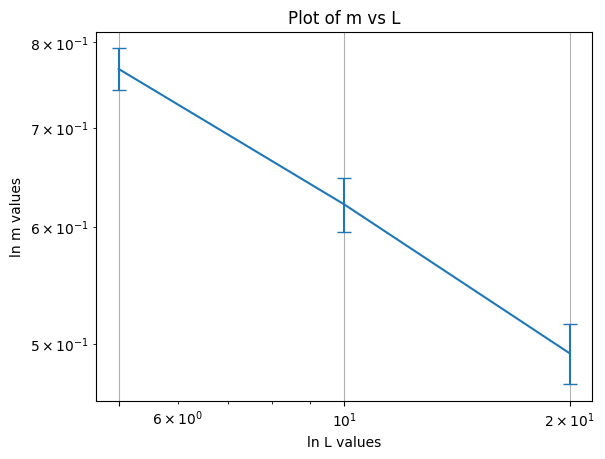

In [ ]:
betac = 0.42
index_array = np.where(betas == betac)[0]
index = int(index_array[0])

print(mean_abs_spins[5][index])
print(mean_abs_spins[10][index])
print(mean_abs_spins[20][index])
L_list = [5, 10, 20]
m_list = [ mean_abs_spins[5][index],  mean_abs_spins[10][index],  mean_abs_spins[20][index]]
std_list = [std_abs_spins[5][index], std_abs_spins[10][index], std_abs_spins[20][index]]
plt.errorbar(L_list, m_list, yerr=std_list, capsize=5)
plt.xlabel('ln L values')
plt.ylabel('ln m values')
plt.title('Plot of m vs L')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xticks(L_list)